[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[1.        0.83125   0.8270845 0.075     0.285833  1.       ]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[1.        0.3715625 0.91125   0.019375  0.075834  1.       ]
[1.        0.7959375 0.7104155 0.060625  0.229167  1.       ]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[1.       0.52     0.85625  0.07375  0.260834 1.      ]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[1.       0.6225   0.680831 0.00875  0.035    1.      ]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[1.        0.936875  0.6691655 0.01125   0

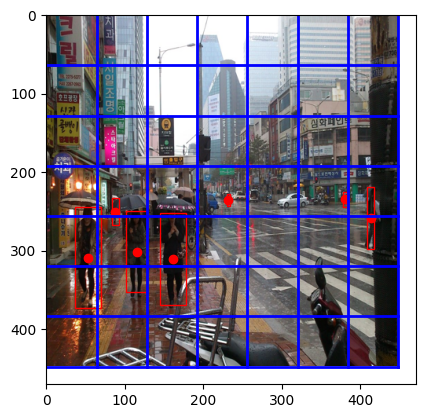

In [2]:
"""
This file downloads the train, test and validation datasets used for training the CNN.
We have used fiftyone's zoo library to download from the openImages v7.

The entire Open Images V7  database size is 561 GB, It contains ~9 million images that 
around 2 million of them are annotated (Classification, Detection, Segmentation, etc.).
The zoo library supports partial download of the entire dataset which helps a lot with 
our purpose.

* All images have been rescaled so that their largest dimension is at most 1024 pixels.
"""
import fiftyone as fo
import fiftyone.zoo as foz
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Necessary for readig an image
import matplotlib.patches as patches # Necessary for drawing bounding boxes
import json
import dataHandler as handler

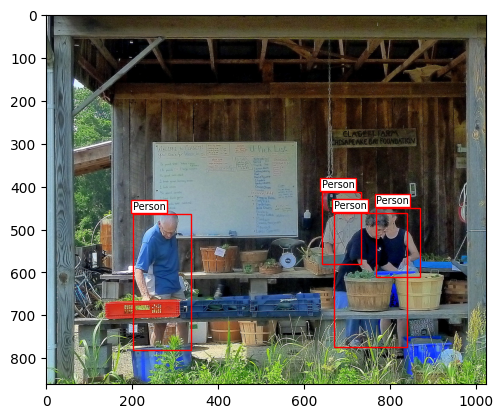

In [4]:

## Examples of using dispBBox method
# handler.dispBBox("./data/images/train", "000802121329b103", js, ["Person"])
# handler.dispBBox("./data/images/train", "000802121329b103", "./data/labels/train/000802121329b103.txt", ["Person"])

In [6]:
file = open("./data/labels/train/labels.json")
js = json.load(file)
type(js) == dict

1

In [2]:
# Download the necessary data and dataset images for training. We have chosen "open-images-v7-object-detection-DS"
# as the name.
dsName = "open-images-v7-object-detection-DS-train"
dsClasses = ["Person"]
dsSplit = "train"
dsLblTypes = ["detections", "classifications"]
nSamples = 1000

if not fo.dataset_exists(dsName):
    dataset = foz.load_zoo_dataset(
        "open-images-v7",
        split = dsSplit,
        label_types = dsLblTypes,
        classes = dsClasses,
        max_samples = nSamples,
        seed = 1,
        shuffle = True,
        dataset_name = dsName,
    )
else:
    datasetTrain = fo.load_dataset(dsName)
    print("Dataset already loaded.")

Dataset already loaded.


In [3]:
# Download the necessary data and dataset images for testing. We have chosen "open-images-v7-object-detection-DS"
# as the name.
dsName = "open-images-v7-object-detection-DS-test"
dsClasses = ["Person"]
dsSplit = "test"
dsLblTypes = ["detections", "classifications"]
nSamples = 1000

if not fo.dataset_exists(dsName):
    dataset = foz.load_zoo_dataset(
        "open-images-v7",
        split = dsSplit,
        label_types = dsLblTypes,
        classes = dsClasses,
        max_samples = nSamples,
        seed = 2,
        shuffle = True,
        dataset_name = dsName,
    )
else:
    datasetTest = fo.load_dataset(dsName)
    print("Dataset already loaded. ")

Dataset already loaded.


In [168]:
# Exporting the downloaded datasets to the desired locations.
# Test data
datasetTrain.export(
    data_path = "./data/images/train",
    labels_path = "./data/labels/train/labels.json",
    dataset_type = fo.types.FiftyOneImageDetectionDataset,
    classes = dsClasses,
    include_confidence = False
)

# Test data
datasetTest.export(
    data_path = "./data/images/test",
    labels_path = "./data/labels/test/labels.json",
    dataset_type = fo.types.FiftyOneImageDetectionDataset,
    classes = dsClasses,
    include_confidence = False
)

Directory './data/images/train' already exists; export will be merged with existing files
 100% |███████████████| 1000/1000 [3.5s elapsed, 0s remaining, 292.9 samples/s]      
Directory './data/images/test' already exists; export will be merged with existing files
 100% |███████████████| 1000/1000 [5.5s elapsed, 0s remaining, 202.7 samples/s]      


In [53]:
# Deserialize the json file and convert it to text files to make it compatible with yolov8
# Training dataset
file = open("./data/labels/train/labels.json")
js = json.load(file)
for item in js["labels"]:
    txt = ""
    with open(f"./data/labels/train/{item}.txt", 'w') as txtFile:
        for subItem in js["labels"][item]: 
            width = subItem["bounding_box"][2]
            height = subItem["bounding_box"][3]
            centerX = subItem["bounding_box"][0] + width/2
            centerY = subItem["bounding_box"][1] + height/2
            label = subItem["label"]
            txt += f"{label} {centerX} {centerY} {width} {height}\n"
        txtFile.write(txt)
        txtFile.close()
    

file = open("./data/labels/test/labels.json")
js = json.load(file)
for item in js["labels"]:
    txt = ""
    with open(f"./data/labels/test/{item}.txt", 'w') as txtFile:
        for subItem in js["labels"][item]: 
            width = subItem["bounding_box"][2]
            height = subItem["bounding_box"][3]
            centerX = subItem["bounding_box"][0] + width/2
            centerY = subItem["bounding_box"][1] + height/2
            label = subItem["label"]
            txt += f"{label} {centerX} {centerY} {width} {height}\n"
        txtFile.write(txt)
        txtFile.close()
    

In [4]:
# List the current datasets
fo.list_datasets()

['open-images-v7-object-detection-DS-test',
 'open-images-v7-object-detection-DS-train']

In [79]:
# See the samples
aa = fo.load_dataset("open-images-v7-object-detection-DS-test")
session = fo.launch_app(aa.view())